<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Подготовка-данных" data-toc-modified-id="Подготовка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Подготовка данных</a></span></li><li><span><a href="#Исследование-задачи" data-toc-modified-id="Исследование-задачи-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Исследование задачи</a></span></li><li><span><a href="#Борьба-с-дисбалансом" data-toc-modified-id="Борьба-с-дисбалансом-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Борьба с дисбалансом</a></span></li><li><span><a href="#Тестирование-модели" data-toc-modified-id="Тестирование-модели-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Тестирование модели</a></span></li><li><span><a href="#Вывод:" data-toc-modified-id="Вывод:-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Вывод:</a></span></li></ul></div>

## Подготовка данных

In [1]:
import pandas as pd
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from joblib import dump
from sklearn.linear_model import LogisticRegression 
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import recall_score 
from sklearn.metrics import precision_score
from sklearn.metrics  import f1_score
from sklearn.metrics import roc_curve 
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score 
from sklearn.preprocessing import StandardScaler 
pd.options.mode.chained_assignment = None
from sklearn.utils import shuffle
import numpy as np
df = pd.read_csv('/datasets/Churn.csv')
df.head(10)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2.0,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1.0,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8.0,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1.0,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2.0,125510.82,1,1,1,79084.10,0
5,6,15574012,Chu,645,Spain,Male,44,8.0,113755.78,2,1,0,149756.71,1
6,7,15592531,Bartlett,822,France,Male,50,7.0,0.00,2,1,1,10062.80,0
7,8,15656148,Obinna,376,Germany,Female,29,4.0,115046.74,4,1,0,119346.88,1
8,9,15792365,He,501,France,Male,44,4.0,142051.07,2,0,1,74940.50,0
9,10,15592389,H?,684,France,Male,27,2.0,134603.88,1,1,1,71725.73,0


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           9091 non-null   float64
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(3), int64(8), object(3)
memory usage: 1.1+ MB


In [3]:
df.duplicated().sum()

0

In [4]:
df['RowNumber'].unique()

array([    1,     2,     3, ...,  9998,  9999, 10000])

Столбец Индекс строки данных не несет смысловой нагрузки на наше исследование, удалим его.

In [5]:
df['CustomerId'].unique()

array([15634602, 15647311, 15619304, ..., 15584532, 15682355, 15628319])

Столбец Индекс строки данных не несет смысловой нагрузки на наше исследование, удалим его.

In [6]:
df['Surname'].unique()

array(['Hargrave', 'Hill', 'Onio', ..., 'Kashiwagi', 'Aldridge',
       'Burbidge'], dtype=object)

Столбец Фамилия не несет смысловой нагрузки на наше исследование, удалим его.

In [7]:
df = df.drop(['RowNumber','CustomerId','Surname'], axis=1)

In [8]:
df.isna().sum()

CreditScore          0
Geography            0
Gender               0
Age                  0
Tenure             909
Balance              0
NumOfProducts        0
HasCrCard            0
IsActiveMember       0
EstimatedSalary      0
Exited               0
dtype: int64

In [9]:
df['Tenure'].unique()

array([ 2.,  1.,  8.,  7.,  4.,  6.,  3., 10.,  5.,  9.,  0., nan])

В столбце "Сколько лет человек является клиентом банка" есть пропуски. Можно предположить, что это новые клиенты. Заменим значения Nan на 0

In [10]:
df['Tenure']=df['Tenure'].fillna(0)
df.isna().sum()

CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [11]:
df.describe()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,650.528800,38.921800,4.543400,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,96.653299,10.487806,3.111573,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,584.000000,32.000000,2.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,652.000000,37.000000,4.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


В первой части нашего исследования мы изучили и подготовили данные для дальнейшей работы. Проверили на наличие дубликатов, убрали пропуски в данных и удалили столбцы в данных, которые не нужны для дальнейшего исследования.

## Исследование задачи

Преобразем датафрейм техникой OHE. Чтобы не попасть в дамми-ловушку, применим аргумент drop_first функции pd.get_dummies(). 


In [12]:

df_OHE = pd.get_dummies(df,drop_first=True)


In [13]:
#Разобьем данные на выборки: Обучающую, валидационную, тестовую в соотношении 60-20-20 соотвественно.

target = df_OHE['Exited']
features = df_OHE.drop('Exited', axis = 1)

# делим выборку на train, valid на 0,6 и 0,4 соответственно
features_train, features_valid, target_train, target_valid= train_test_split(features,target, test_size=0.4, random_state=12345, shuffle=True)
# делим выборку valid на valid и test 0,4 делим пополам
features_valid, features_test, target_valid, target_test = train_test_split(features_valid,target_valid, test_size=0.5, random_state=12345, shuffle=True)


print(features_train.shape, features_valid.shape, features_test.shape)
print(target_train.shape, target_valid.shape, target_test.shape)


(6000, 11) (2000, 11) (2000, 11)
(6000,) (2000,) (2000,)


Исследуем модели: 1 Дерево 2 Случайный лес 3 Логическая регрессия

In [14]:
%%time
for depth in range(1, 20):
    model = DecisionTreeClassifier(random_state=12345, max_depth=depth) #  создадим модель, указав max_depth=depth 
    model.fit(features_train,target_train) #  обучим модель 
    predictions_valid = model.predict(features_valid) #  найдем предсказания на валидационной выборке 
    
    print("max_depth =", depth, ": ", end='')
    print(accuracy_score(target_valid, predictions_valid))

max_depth = 1 : 0.791
max_depth = 2 : 0.824
max_depth = 3 : 0.838
max_depth = 4 : 0.852
max_depth = 5 : 0.853
max_depth = 6 : 0.858
max_depth = 7 : 0.8505
max_depth = 8 : 0.8505
max_depth = 9 : 0.85
max_depth = 10 : 0.834
max_depth = 11 : 0.8225
max_depth = 12 : 0.81
max_depth = 13 : 0.818
max_depth = 14 : 0.8005
max_depth = 15 : 0.8035
max_depth = 16 : 0.799
max_depth = 17 : 0.787
max_depth = 18 : 0.794
max_depth = 19 : 0.7915
CPU times: user 442 ms, sys: 1.14 ms, total: 443 ms
Wall time: 449 ms


Лучшее значение на глубине 7.

Теперь исследуем модель случайный лес.


In [15]:
%%time 
best_model_forest = None
best_result = 0
for est in range(50, 351, 50):
    model = RandomForestClassifier(random_state=12345, n_estimators=est) # создадим модель с заданным количеством деревьев
    model.fit(features_train, target_train) # обучим модель на тренировочной выборке
    result = model.score(features_valid, target_valid) # посчитаем качество модели на валидационной выборке
    if result > best_result:
        best_model_forest= model# сохраним наилучшую модель
        best_result = result #  сохраним наилучшее значение метрики accuracy на валидационных данных
print("Accuracy наилучшей модели на валидационной выборке:", best_result)        

Accuracy наилучшей модели на валидационной выборке: 0.8605
CPU times: user 9.61 s, sys: 147 ms, total: 9.76 s
Wall time: 9.77 s


Теперь исследуем модель Логическая регрессия

In [16]:
%%time
model = LogisticRegression(random_state=12345, solver = 'lbfgs', max_iter = 100)# создадим модель с заданными параметрами, возьмем количество итераций по умолчанию 
model.fit(features_train, target_train)
model_predict = model.predict(features_valid) 
model.score(features, target) 

CPU times: user 202 ms, sys: 418 ms, total: 620 ms
Wall time: 558 ms


0.7902

Результат ниже, чем у двух предыдущих.

Посмотрим на значения  полноты,  точности моделей, F1

Начнем с дерева

In [17]:
%%time

model = DecisionTreeClassifier(random_state=20052020, max_depth=7)
model.fit(features_train, target_train)
predicted_valid = model.predict(features_valid)
print('Дерево')
print('Точность', precision_score(target_valid, predicted_valid))
print('Полнота', recall_score(target_valid, predicted_valid))
print('F1- мера', f1_score(target_valid, predicted_valid))
print()


Дерево
Точность 0.7685589519650655
Полнота 0.42105263157894735
F1- мера 0.5440494590417311

CPU times: user 44.5 ms, sys: 23.9 ms, total: 68.4 ms
Wall time: 111 ms


Теперь случайный лес

In [18]:
%%time
model = RandomForestClassifier(random_state=12345, n_estimators=100) 
model.fit(features_train, target_train) 

predicted_valid = model.predict(features_valid)
print('Случайный лес')
print('Точность', precision_score(target_valid, predicted_valid))
print('Полнота', recall_score(target_valid, predicted_valid))
print('F1- мера', f1_score(target_valid, predicted_valid))
print()

Случайный лес
Точность 0.7626459143968871
Полнота 0.4688995215311005
F1- мера 0.5807407407407408

CPU times: user 669 ms, sys: 7.76 ms, total: 677 ms
Wall time: 690 ms


И осталась у нас модель Логическая регрессия

In [19]:
%%time
model = LogisticRegression(random_state=12345, solver = 'lbfgs', max_iter = 100)
model.fit(features_train, target_train)
predicted_valid = model.predict(features_valid)
print('Логическая регрессия')
print('Точность', precision_score(target_valid, predicted_valid))
print('Полнота', recall_score(target_valid, predicted_valid))
print('F1- мера', f1_score(target_valid, predicted_valid))
print()

Логическая регрессия
Точность 0.3387096774193548
Полнота 0.050239234449760764
F1- мера 0.08750000000000001

CPU times: user 229 ms, sys: 500 ms, total: 730 ms
Wall time: 688 ms


Модель дерево

auc_roc 0.818761757571725


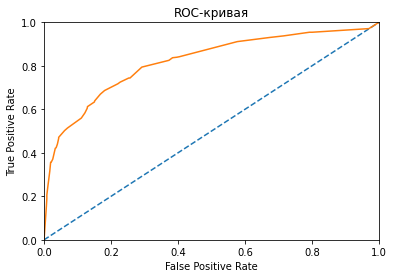

In [20]:
model = DecisionTreeClassifier(random_state=20052020, max_depth=7)
model.fit(features_train, target_train)
probabilities_valid = model.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]

fpr, tpr, thresholds = roc_curve(target_valid, probabilities_one_valid)
auc_roc = roc_auc_score(target_valid, probabilities_one_valid)
plt.figure()
plt.plot([0, 1], [0, 1], linestyle='--')

plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-кривая')
print('auc_roc', auc_roc)
plt.show()

Модель случайный лес

auc_roc 0.8424114893025


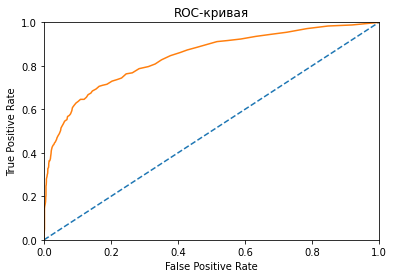

In [21]:
model = RandomForestClassifier(random_state=12345, n_estimators=100) 
model.fit(features_train, target_train)
probabilities_valid = model.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]

fpr, tpr, thresholds = roc_curve(target_valid, probabilities_one_valid)
auc_roc = roc_auc_score(target_valid, probabilities_one_valid)
plt.figure()
plt.plot([0, 1], [0, 1], linestyle='--')

plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-кривая')
print('auc_roc', auc_roc)
plt.show()

Модель логическая регрессия

auc_roc 0.6736022477755128


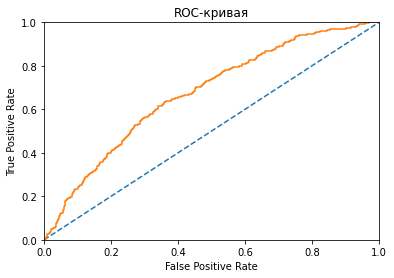

In [22]:
model = LogisticRegression(random_state=12345, solver = 'lbfgs', max_iter = 100)
model.fit(features_train, target_train)
probabilities_valid = model.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]

fpr, tpr, thresholds = roc_curve(target_valid, probabilities_one_valid)
auc_roc = roc_auc_score(target_valid, probabilities_one_valid)
plt.figure()
plt.plot([0, 1], [0, 1], linestyle='--')

plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-кривая')
print('auc_roc', auc_roc)
plt.show()

Судя по графикам, кривая ошибок выше у модели Случайный лес. Это значит, что истинно-положительных ответов у нее больше, соответсвенно и качество лучше.

## Борьба с дисбалансом

Сначала стандартизируем численные признаки. Импортируем StandardScaler из модуля sklearn.preprocessing.
Создадим объект структуры StandardScaler() и настройте его на обучающих данных.

In [23]:
numeric = ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary']

scaler = StandardScaler()
scaler.fit(features_train[numeric]) 
features_train[numeric] = scaler.transform(features_train[numeric])
features_valid[numeric]= scaler.transform(features_valid[numeric]) 
features_test[numeric]= scaler.transform(features_test[numeric]) 
print(features_train.head())

      CreditScore       Age    Tenure   Balance  NumOfProducts  HasCrCard  \
7479    -0.886751 -0.373192  1.104696  1.232271      -0.891560   0.642466   
3411     0.608663 -0.183385  1.104696  0.600563      -0.891560  -1.556504   
6027     2.052152  0.480939 -0.503694  1.027098       0.830152  -1.556504   
1247    -1.457915 -1.417129  0.461340 -1.233163       0.830152   0.642466   
3716     0.130961 -1.132419 -0.825373  1.140475      -0.891560  -1.556504   

      IsActiveMember  EstimatedSalary  Geography_Germany  Geography_Spain  \
7479       -1.055187        -0.187705                  0                1   
3411       -1.055187        -0.333945                  0                0   
6027        0.947699         1.503095                  1                0   
1247       -1.055187        -1.071061                  0                0   
3716       -1.055187         1.524268                  1                0   

      Gender_Male  
7479            1  
3411            0  
6027          

Теперь сравним модели:
1. Со взвешенными классами
2. С увеличением выборки
3. С уменьшением выборки

In [24]:
# Начнем с взвешивания классов


model = DecisionTreeClassifier(random_state=20052020, max_depth=7, class_weight='balanced')
model.fit(features_train, target_train)
predicted_valid = model.predict(features_valid)
print('Дерево')
print('Точность', precision_score(target_valid, predicted_valid))
print('Полнота', recall_score(target_valid, predicted_valid))
print('F1- мера', f1_score(target_valid, predicted_valid))
print()


model = RandomForestClassifier(random_state=12345, n_estimators=100, class_weight='balanced' ) 
model.fit(features_train, target_train) 

predicted_valid = model.predict(features_valid)
print('Случайный лес')
print('Точность', precision_score(target_valid, predicted_valid))
print('Полнота', recall_score(target_valid, predicted_valid))
print('F1- мера', f1_score(target_valid, predicted_valid))
print()


model = LogisticRegression(random_state=12345, solver = 'lbfgs', max_iter = 100, class_weight='balanced')
model.fit(features_train, target_train)
predicted_valid = model.predict(features_valid)
print('Логическая регрессия')
print('Точность', precision_score(target_valid, predicted_valid))
print('Полнота', recall_score(target_valid, predicted_valid))
print('F1- мера', f1_score(target_valid, predicted_valid))
print()

Дерево
Точность 0.47766323024054985
Полнота 0.6650717703349283
F1- мера 0.5559999999999999

Случайный лес
Точность 0.773109243697479
Полнота 0.44019138755980863
F1- мера 0.5609756097560976

Логическая регрессия
Точность 0.3803191489361702
Полнота 0.6842105263157895
F1- мера 0.4888888888888888



Самые явные изменения у Логической регрессии: Полнота и F-мера увеличились в несколько раз.

In [25]:
#Теперь исследуем увеличение выборки
repeat = 4


def upsample(features, target, repeat):
  
    features_zeros = features_train[target_train == 0]
    features_ones = features_train[target_train == 1]
    target_zeros = target_train[target_train == 0]
    target_ones = target_train[target_train == 1]
    features_upsampled = pd.concat([features_zeros] + [features_ones] * repeat)
    target_upsampled = pd.concat([target_zeros] + [target_ones] * repeat)
    features_upsampled, target_upsampled = shuffle (features_upsampled, target_upsampled, random_state=12345)

    return features_upsampled, target_upsampled


features_upsampled, target_upsampled = upsample(features_train, target_train, 4)

print(features_upsampled.shape)
print(target_upsampled.shape)
print(target_upsampled.value_counts())

(9588, 11)
(9588,)
0    4804
1    4784
Name: Exited, dtype: int64


In [26]:
model = DecisionTreeClassifier(random_state=20052020, max_depth=7)
model.fit(features_upsampled, target_upsampled)
predicted_valid = model.predict(features_valid)
print('Дерево')
print('Точность', precision_score(target_valid, predicted_valid))
print('Полнота', recall_score(target_valid, predicted_valid))
print('F1- мера', f1_score(target_valid, predicted_valid))
print()


model = RandomForestClassifier(random_state=12345, n_estimators=100) 
model.fit(features_upsampled, target_upsampled) 

predicted_valid = model.predict(features_valid)
print('Случайный лес')
print('Точность', precision_score(target_valid, predicted_valid))
print('Полнота', recall_score(target_valid, predicted_valid))
print('F1- мера', f1_score(target_valid, predicted_valid))
print()


model = LogisticRegression(random_state=12345, solver = 'lbfgs', max_iter = 100)
model.fit(features_upsampled, target_upsampled)
predicted_valid = model.predict(features_valid)
print('Логическая регрессия')
print('Точность', precision_score(target_valid, predicted_valid))
print('Полнота', recall_score(target_valid, predicted_valid))
print('F1- мера', f1_score(target_valid, predicted_valid))
print()

Дерево
Точность 0.4793103448275862
Полнота 0.6650717703349283
F1- мера 0.5571142284569138

Случайный лес
Точность 0.6756756756756757
Полнота 0.5382775119617225
F1- мера 0.5992010652463382

Логическая регрессия
Точность 0.3794940079893475
Полнота 0.6818181818181818
F1- мера 0.4875962360992301



Показатели моделей Дерево и Случайный лес почти не изменились, показатели модели Логическая регрессия выросли, но в случае взвешивания классов рост оказался выше.

In [27]:
#Теперь исследуем уменьшение выборки
fraction = 0.2
def downsample(features, target, fraction):
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]
    features_downsampled = pd.concat(
        [features_zeros.sample(frac=fraction, random_state=12345)] + [features_ones])
    target_downsampled = pd.concat(
        [target_zeros.sample(frac=fraction, random_state=12345)] + [target_ones])
    features_downsampled, target_downsampled = shuffle (features_downsampled, 
                                                        target_downsampled, random_state=12345)
    return features_downsampled, target_downsampled

features_downsampled, target_downsampled = downsample(features_train, target_train, 0.2)

print(features_downsampled.shape)
print(target_downsampled.shape)


(2157, 11)
(2157,)


In [28]:
model = DecisionTreeClassifier(random_state=20052020, max_depth=7)
model.fit(features_downsampled, target_downsampled)
predicted_valid = model.predict(features_valid)
print('Дерево')
print('Точность', precision_score(target_valid, predicted_valid))
print('Полнота', recall_score(target_valid, predicted_valid))
print('F1- мера', f1_score(target_valid, predicted_valid))
print()


model = RandomForestClassifier(random_state=12345, n_estimators=100) 
model.fit(features_downsampled, target_downsampled) 

predicted_valid = model.predict(features_valid)
print('Случайный лес')
print('Точность', precision_score(target_valid, predicted_valid))
print('Полнота', recall_score(target_valid, predicted_valid))
print('F1- мера', f1_score(target_valid, predicted_valid))
print()


model = LogisticRegression(random_state=12345, solver = 'lbfgs', max_iter = 100)
model.fit(features_downsampled, target_downsampled)
predicted_valid = model.predict(features_valid)
print('Логическая регрессия')
print('Точность', precision_score(target_valid, predicted_valid))
print('Полнота', recall_score(target_valid, predicted_valid))
print('F1- мера', f1_score(target_valid, predicted_valid))
print()

Дерево
Точность 0.3978622327790974
Полнота 0.8014354066985646
F1- мера 0.5317460317460317

Случайный лес
Точность 0.4336870026525199
Полнота 0.7822966507177034
F1- мера 0.5580204778156997

Логическая регрессия
Точность 0.3530751708428246
Полнота 0.7416267942583732
F1- мера 0.478395061728395



Если сравнивать все значения F1 меры, то лучшее было еще до проведения дисбаланса. На модели Случайный лес при est=100 F1 -мера равна 0,580.

## Тестирование модели

Для тестирования выберем модель Случайный лес. Судя по графикам, кривая ошибок выше у модели Случайный лес. Это значит, что истинно-положительных ответов у нее больше, соответсвенно и качество лучше. На модели Случайный лес при est=100 F1 -мера равна 0,580 - пока это лучший результат в нашем исследовании

Методом "научного тыка" поэкспериментировали с гиперпараметрами на модели Случайный лес. Необходимое минимальное значение F1 -меры нашлось в диапазоне 280-282

In [29]:
%%time


for est in range(280,285):
    model = RandomForestClassifier(random_state=12345, n_estimators=est) 
    model.fit(features_upsampled, target_upsampled)
    predicted_valid = model.predict(features_valid)


    print("est:", est ,'F1', f1_score(target_valid, predicted_valid))

est: 280 F1 0.6031746031746033
est: 281 F1 0.6068601583113458
est: 282 F1 0.6050198150594451
est: 283 F1 0.6042216358839051
est: 284 F1 0.6005291005291005
CPU times: user 13.3 s, sys: 175 ms, total: 13.5 s
Wall time: 13.6 s


In [30]:

print('accuracy', accuracy_score(target_valid, predicted_valid))
print('Точность', precision_score(target_valid, predicted_valid))
print('Полнота', recall_score(target_valid, predicted_valid))
print('F1- мера', f1_score(target_valid, predicted_valid))

accuracy 0.849
Точность 0.6715976331360947
Полнота 0.5430622009569378
F1- мера 0.6005291005291005


In [31]:

%%time

predicted_test = model.predict(features_test)


print('accuracy', accuracy_score(target_test, predicted_test))
print('Точность', precision_score(target_test, predicted_test))
print('Полнота', recall_score(target_test, predicted_test))
print('F1- мера', f1_score(target_test, predicted_test))

accuracy 0.8395
Точность 0.650887573964497
Полнота 0.5200945626477541
F1- мера 0.5781865965834427
CPU times: user 149 ms, sys: 3.84 ms, total: 153 ms
Wall time: 163 ms


auc_roc 0.8527045846693981


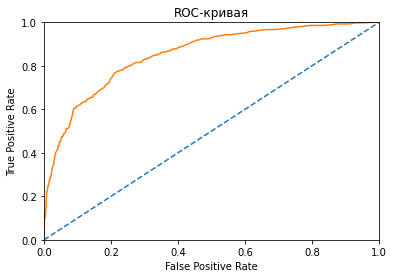

In [32]:

probabilities_test = model.predict_proba(features_test)
probabilities_one_test = probabilities_test[:, 1]

fpr, tpr, thresholds = roc_curve(target_test, probabilities_one_test)
auc_roc = roc_auc_score(target_test, probabilities_one_test)
plt.figure()
plt.plot([0, 1], [0, 1], linestyle='--')

plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-кривая')
print('auc_roc', auc_roc)
plt.show()

Кривая ошибок выше средней линии. Это значит, что истинно-положительных ответов у нее больше, соответсвенно и качество лучше.

## Вывод: 
В данном исследовании мы изучили и подготовили данные, Исследовали баланс классов и обучили модель сначала без учета дизбаланса, а потом и с учетом. Нашли, что при увеличении выборки модель случайного леса показывает наибольшее значение А1. Проверили на этой модели тестовую выборку. Значение F1-метрики на на тестовой модели 0,589 а площадь под кривой 0,84, что приближается к 1, то есть доля истинно-положительных ответов достаточно высока.